In [1]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
from torch.autograd import Variable
import librosa

In [2]:
df=pd.read_csv("cv_corpus_v1/cv_corpus_v1/cv-valid-train.csv")

In [3]:
df=df.dropna(thresh=5)
df.head()

,filename,text,up_votes,down_votes,age,gender,accent,duration
5,cv-valid-train/sample-000005.mp3,a shepherd may like to travel but he should ne...,1,0,twenties,female,us,NaN
8,cv-valid-train/sample-000008.mp3,put jackie right on the staff,3,0,seventies,male,us,NaN
13,cv-valid-train/sample-000013.mp3,but he had found a guide and didn't want to mi...,1,0,thirties,female,us,NaN
14,cv-valid-train/sample-000014.mp3,as they began to decorate the hallway a silhou...,1,0,sixties,male,england,NaN
19,cv-valid-train/sample-000019.mp3,then they got ahold of some dough and went goofy,1,0,fifties,male,australia,NaN


In [4]:
ar=df["filename"].as_matrix()
ar=ar[:200]
lab=df["gender"].as_matrix()
lab=lab[:200]
ms, _ =librosa.load("cv_corpus_v1/cv_corpus_v1/"+ar[0])

ms=ms[:10000]


In [91]:

class Encoder(nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        self.layer1 = nn.Sequential(
                        nn.Conv1d(10000,1000,1),
                        nn.ReLU(),
                        nn.BatchNorm1d(1000),
                        nn.Conv1d(1000,500,1),
                        nn.ReLU(),
                        nn.BatchNorm1d(500),
                        nn.Conv1d(500,250,1),
                        nn.ReLU(),
                        nn.BatchNorm1d(250)
        )
        
        self.layer2 = nn.Sequential(
                        nn.Linear(250,100),
                        nn.ReLU(),
                        nn.Linear(100,1),
                        nn.Sigmoid()
        )
        
    def forward(self,x):
        x=self.layer1(x)
        x=x.view(-1,250)
        x=self.layer2(x)
        
        return x

en=Encoder()

In [92]:
criterion=nn.BCELoss()
optimizer=torch.optim.SGD(en.parameters(),lr=0.2)
lo=np.zeros(50)

In [93]:
for i in range(50):
    labels=np.zeros(4)
    for j in range(4):
        aud_init,_=librosa.load("cv_corpus_v1/cv_corpus_v1/"+ar[4*i+j])
        aud_init=aud_init[:10000]
        
        aud_init=np.reshape(aud_init,(10000,1))
        if(j==0):
            x_init=aud_init
        else:
            x_init=np.vstack((x_init,aud_init))
            
        if(lab[4*i+j]=="female"):
            labels[j]=0
        else:
            labels[j]=1
        
    x_init=np.reshape(x_init,(4,10000,1))
    x_torch=torch.from_numpy(x_init).type(torch.FloatTensor)
    x=Variable(x_torch)
    labels_torch=torch.from_numpy(labels).type(torch.FloatTensor)
    label=Variable(labels_torch)
    
    optimizer.zero_grad()
    
    out=en(x)
    
    out=out.view(4)
    
    loss=criterion(out,label)
    
    loss.backward()
    
    optimizer.step()
    print(loss.data)
    lo[i]=loss.data[0]
    


 0.6932
[torch.FloatTensor of size 1]


 0.6794
[torch.FloatTensor of size 1]


 0.6527
[torch.FloatTensor of size 1]


 0.6581
[torch.FloatTensor of size 1]


 0.5425
[torch.FloatTensor of size 1]


 0.9887
[torch.FloatTensor of size 1]


 0.5093
[torch.FloatTensor of size 1]


 0.5819
[torch.FloatTensor of size 1]


 0.5963
[torch.FloatTensor of size 1]


 0.8405
[torch.FloatTensor of size 1]


 0.4774
[torch.FloatTensor of size 1]


 0.9226
[torch.FloatTensor of size 1]


 0.4342
[torch.FloatTensor of size 1]


 1.0287
[torch.FloatTensor of size 1]


 0.5956
[torch.FloatTensor of size 1]


 0.5417
[torch.FloatTensor of size 1]


 0.3652
[torch.FloatTensor of size 1]


 0.5282
[torch.FloatTensor of size 1]


 0.4883
[torch.FloatTensor of size 1]


 0.5795
[torch.FloatTensor of size 1]


 1.0776
[torch.FloatTensor of size 1]


 0.5609
[torch.FloatTensor of size 1]


 0.4774
[torch.FloatTensor of size 1]


 0.4349
[torch.FloatTensor of size 1]


 0.7264
[torch.FloatTensor of size 1]



In [94]:
num=[i for i in range(50)]


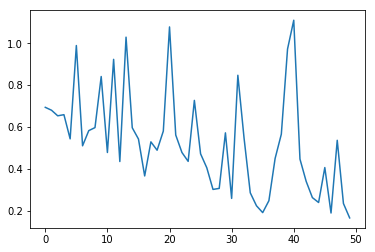

In [95]:
import matplotlib.pyplot as plt
plt.plot(num,lo)
plt.show()